**Predict Loan Default**

In [ ]:
#view file extracted
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_default.csv')
display(df.head())

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
#shape
df.shape

(255347, 18)

In [ ]:
#view column
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
#datatype
df.dtypes


,0
LoanID,object
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64


In [ ]:
#null
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
#describe
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# Problem definition

In [ ]:
# 1. Problem Definition:
# The problem is to predict whether a loan applicant will default on their loan based on the provided dataset.
# This is a binary classification problem where the target variable 'Default' indicates whether a loan was defaulted (1) or not (0).

# 2. Goals of the analysis:
# The primary goal is to build a predictive model that can accurately classify loan applications into 'Default' or 'No Default'.
# A successful outcome would be a model with high accuracy, precision, and recall, particularly for the 'Default' class,
# as misclassifying a defaulting loan as non-defaulting can lead to financial losses.

# 3. Potential Impact/Use:
# A successful model can be used by financial institutions to assess the risk of loan applicants,
# automate loan approval processes, set appropriate interest rates, and potentially reduce financial losses due to defaults.
# It can also help in identifying key factors that contribute to loan defaults.

print("Problem Definition: Predict whether a loan applicant will default based on the provided data.")
print("Goals: Build an accurate predictive model for loan default (binary classification). Achieve high accuracy, precision, and recall, especially for the 'Default' class.")
print("Potential Impact: Improve risk assessment, automate loan approvals, reduce financial losses, and identify key risk factors for financial institutions.")

Problem Definition: Predict whether a loan applicant will default based on the provided data.
Goals: Build an accurate predictive model for loan default (binary classification). Achieve high accuracy, precision, and recall, especially for the 'Default' class.
Potential Impact: Improve risk assessment, automate loan approvals, reduce financial losses, and identify key risk factors for financial institutions.


## Data cleaning and preprocessing

Handle missing values, outliers, and transform data into a suitable format for analysis.


In [ ]:
# 1. Check for and handle any duplicate rows in the DataFrame df.
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# 2. Identify and address potential outliers in the numerical columns of df.
# Using IQR for outlier detection and capping.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    if col != 'Default': # Exclude the target variable
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers handled in numerical columns by capping.")

# 3. Identify categorical columns in df and use an appropriate encoding techniques.
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:", categorical_cols)

# For this dataset, one-hot encoding will be used for its categorical features
# as there is no inherent order in the categories. LoanID is an identifier and will be dropped.
# HasMortgage, HasDependents, HasCoSigner are already binary-like and can be mapped or one-hot encoded.

# 4. Apply any necessary data type conversions or transformations.
# LoanID is dropped, it will not be needed for modeling.
df = df.drop('LoanID', axis=1)
print("\nDropped 'LoanID' column.")

# Display data types after dropping 'LoanID'
print("\nData types after dropping LoanID:")
display(df.dtypes)

Outliers handled in numerical columns by capping.

Categorical columns: ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

Dropped 'LoanID' column.

Data types after dropping LoanID:


,0
Age,float64
Income,float64
LoanAmount,float64
CreditScore,float64
MonthsEmployed,float64
NumCreditLines,float64
InterestRate,float64
LoanTerm,float64
DTIRatio,float64
Education,object


In [ ]:
#Features
#Age:The age of the loan applicant.
#Income: The income of the loan applicant.
#LoanAmount: The amount of the loan.
#CreditScore: The credit score of the loan applicant, which is an indicator of their creditworthiness.
#MonthsEmployed: The number of months the applicant has been employed.
#NumCreditLines: The number of credit lines the applicant has.
#InterestRate: The interest rate of the loan.
#LoanTerm: The term of the loan in months.
#DTIRatio: The Debt-to-Income Ratio, as we discussed earlier.
#Default: This is your target variable, indicating whether the loan was defaulted (1) or not (0).

In [ ]:
# Apply one-hot encoding to categorical columns
categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("\nApplied one-hot encoding to categorical columns.")
print("\nDataFrame after one-hot encoding:")
display(df.head())


Applied one-hot encoding to categorical columns.

DataFrame after one-hot encoding:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0,...,True,False,False,False,True,False,False,False,False,False


## Exploratory Data Analysis (EDA)
Analyzing the data to understand its characteristics, identify patterns, and gain insights.

Correlation Matrix:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


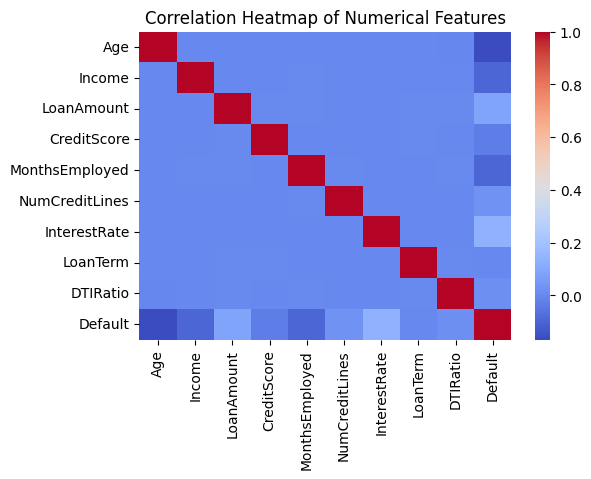

In [ ]:
# Calculate and display the correlation matrix for the numerical columns and generate a heatmap to visualize the relationships.
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display the correlation matrix for the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# 2. Generate a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Analyze the distribution of the target variable 'Default' and explore the relationship between key numerical features and the target variable using visualizations.



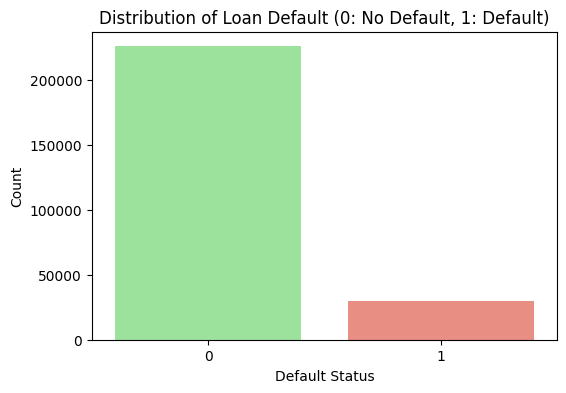

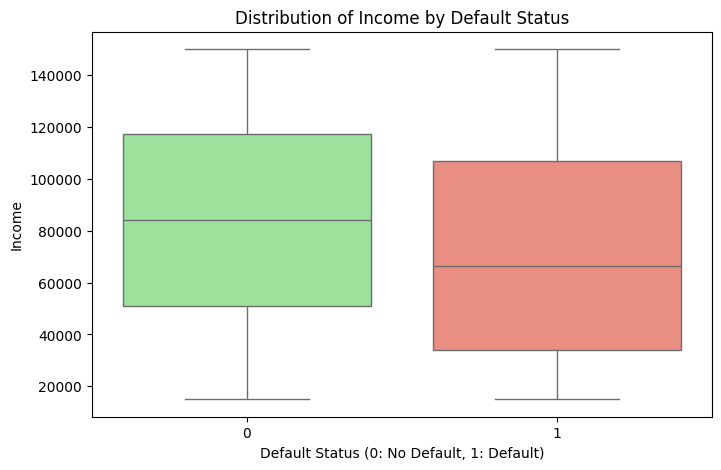

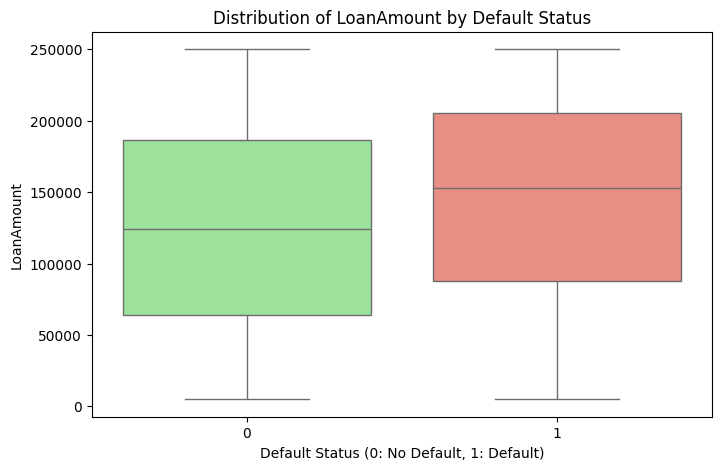

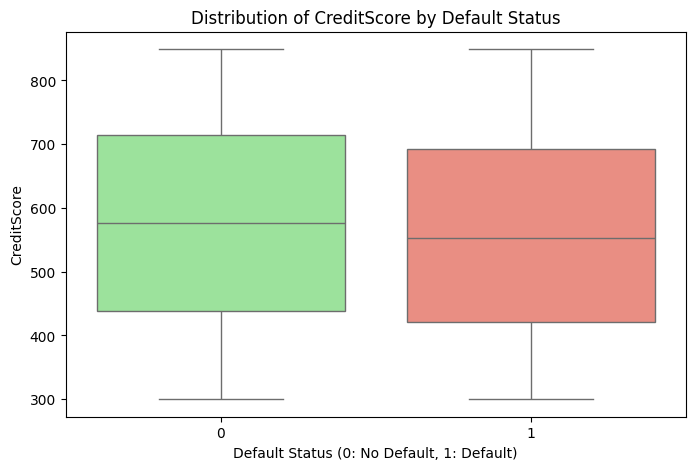

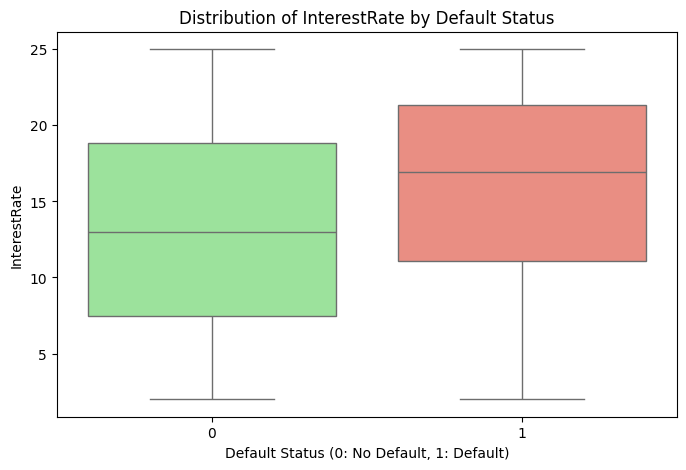

In [ ]:
# 3. Analyze the distribution of the target variable 'Default'
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df, hue='Default', palette={0: 'lightgreen', 1: 'salmon'}, legend=False)
plt.title('Distribution of Loan Default (0: No Default, 1: Default)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# 4. Explore the relationship between key numerical features and the target variable
key_numerical_features = ['Income', 'LoanAmount', 'CreditScore', 'InterestRate']

for feature in key_numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Default', y=feature, data=df, hue='Default', palette={0: 'lightgreen', 1: 'salmon'}, legend=False)
    plt.title(f'Distribution of {feature} by Default Status')
    plt.xlabel('Default Status (0: No Default, 1: Default)')
    plt.ylabel(feature)
    plt.show()

In [ ]:
default_counts = df['Default'].value_counts()
total_loans = df['Default'].count()

percentage_no_default = (default_counts[0] / total_loans) * 100
percentage_default = (default_counts[1] / total_loans) * 100

print(f"Percentage of 'No Default' (0): {percentage_no_default:.2f}%")
print(f"Percentage of 'Default' (1): {percentage_default:.2f}%")
print(f"Ratio of Default to No Default: 1 : {percentage_no_default / percentage_default:.2f}")

Percentage of 'No Default' (0): 88.39%
Percentage of 'Default' (1): 11.61%
Ratio of Default to No Default: 1 : 7.61


Analyze the distribution of categorical features and their relationship with the target variable using visualizations.



In [ ]:
# 5. Analyzing the distribution of categorical features and their relationship with the target variable

# Update the list of categorical columns to reflect the one-hot encoded columns
# the original categorical column names that were encoded will be included, except for 'Default'.
# We can identify these by looking for columns created by one-hot encoding.
encoded_categorical_cols = [col for col in df.columns if '_' in col and col != 'Default']
# Add back the original categorical columns that might not have been one-hot encoded if they were binary Yes/No
# Based on the previous steps, 'HasMortgage_Yes', 'HasDependents_Yes', 'HasCoSigner_Yes' are already in the dataframe.
# We need to remove the original names that were encoded if they still exist (they shouldn't after get_dummies).
# Let's just use the encoded column names and the original binary columns that became _Yes.

categorical_cols_to_plot = [col for col in df.columns if df[col].dtype == 'uint8' and col != 'Default']


for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Default', data=df)
    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Feature engineering

Create new features or transform existing ones to improve the performance of your model.

DTI ratio multiplied by loan amount, interaction terms between CreditScore and InterestRate, and the ratio of LoanAmount to Income. Polynomial features are not created as no highly correlated numerical features were identified in the EDA step.


In [ ]:
# 1. Create a new feature representing the Debt-to-Income (DTI) ratio multiplied by the loan amount.
df['DTIRatio_LoanAmount'] = df['DTIRatio'] * df['LoanAmount']
print("Created 'DTIRatio_LoanAmount' feature.")

# 2. Create interaction terms between 'CreditScore' and 'InterestRate'.
df['CreditScore_InterestRate_Interaction'] = df['CreditScore'] * df['InterestRate']
print("Created 'CreditScore_InterestRate_Interaction' feature.")

# 3. Consider creating polynomial features for highly correlated numerical features if any were identified in the EDA step.
# Based on the EDA step, no highly correlated numerical features were identified.
# Therefore, no polynomial features are created in this step.
print("No highly correlated numerical features identified for polynomial features.")

# 4. Create a new feature that is the ratio of LoanAmount to Income.
# Add a small epsilon to Income to avoid division by zero, although describe() showed min income is 15000.
epsilon = 1e-6
df['LoanAmount_Income_Ratio'] = df['LoanAmount'] / (df['Income'] + epsilon)
print("Created 'LoanAmount_Income_Ratio' feature.")

# Display the first few rows of the DataFrame with the new features
print("\nDataFrame with new features:")
display(df.head())

Created 'DTIRatio_LoanAmount' feature.
Created 'CreditScore_InterestRate_Interaction' feature.
No highly correlated numerical features identified for polynomial features.
Created 'LoanAmount_Income_Ratio' feature.

DataFrame with new features:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,DTIRatio_LoanAmount,CreditScore_InterestRate_Interaction,LoanAmount_Income_Ratio
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0,...,True,True,False,False,False,True,True,22258.28,7919.60,0.588262
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,0,...,False,False,False,False,False,True,True,84619.20,2202.98,2.467481
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,1,...,True,True,False,False,False,False,False,40048.28,9547.67,1.534154
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,0,...,False,False,True,False,False,False,False,10303.77,5253.01,1.412638
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0,...,False,True,False,False,False,False,False,6671.47,4120.83,0.447179


## Model selection


In [ ]:
# 1. Based on the problem definition (binary classification), identify several suitable machine learning algorithms.
# Suitable algorithms for binary classification include:
# - Logistic Regression
# - Support Vector Machines (SVM)
# - Decision Trees
# - Random Forests
# - Gradient Boosting Machines (e.g., LightGBM, XGBoost)
# - K-Nearest Neighbors (KNN)
# - Naive Bayes

# 2. Consider the insights gained from the EDA and feature engineering steps, such as the nature of the features (numerical and one-hot encoded categorical) and the size of the dataset, to narrow down the choices.
# - The dataset is large (over 250,000 rows).
# - Features are a mix of numerical and one-hot encoded categorical variables.
# - Linear models (Logistic Regression, SVM) can work well with this type of data but might struggle with complex non-linear relationships without feature engineering.
# - Tree-based models (Decision Trees, Random Forests, Gradient Boosting) are generally robust to the mix of numerical and categorical features (after encoding) and can capture non-linear interactions. They can be computationally intensive on very large datasets, but modern implementations are optimized.
# - KNN can be computationally expensive for large datasets during prediction.
# - Naive Bayes makes strong independence assumptions, which might not hold.

# 3. List the selected models and provide a brief justification for each choice.

selected_models = {
    "Logistic Regression": "A simple yet powerful linear model that provides probability estimates. Good baseline model, computationally efficient, and interpretable. Works well with the mix of numerical and one-hot encoded features.",
    "Random Forest": "An ensemble tree-based method that can capture complex non-linear relationships and interactions. Less prone to overfitting than single Decision Trees. Generally performs well on diverse datasets and is relatively robust to outliers.",
    "LightGBM": "A gradient boosting framework that is highly efficient and effective, especially on large datasets. Known for its speed and accuracy. Can handle a mix of numerical and categorical features well and often achieves state-of-the-art results.",
    # We could also consider XGBoost, another popular and powerful gradient boosting library,
    # but LightGBM is often faster on large datasets.
    # SVM could be used but can be slow on large datasets without linear kernels or approximations.
    # Decision Trees are good for interpretability but can overfit.
    # KNN and Naive Bayes might not be the best choices for this large and potentially complex dataset.
}

print("Selected Models and Justifications:")
for model, justification in selected_models.items():
    print(f"- {model}: {justification}")

# 4. Do not implement or train the models in this step. This step is purely for selecting and justifying the choice of algorithms.

Selected Models and Justifications:
- Logistic Regression: A simple yet powerful linear model that provides probability estimates. Good baseline model, computationally efficient, and interpretable. Works well with the mix of numerical and one-hot encoded features.
- Random Forest: An ensemble tree-based method that can capture complex non-linear relationships and interactions. Less prone to overfitting than single Decision Trees. Generally performs well on diverse datasets and is relatively robust to outliers.
- LightGBM: A gradient boosting framework that is highly efficient and effective, especially on large datasets. Known for its speed and accuracy. Can handle a mix of numerical and categorical features well and often achieves state-of-the-art results.


## Model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# 1. Separate the features (X) and the target variable (y)
X = df.drop('Default', axis=1)
y = df['Default']
print("Separated features (X) and target (y).")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Split data into training and testing sets.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


# 3. For each model in the selected_models dictionary:
trained_models = {}
for model_name, justification in selected_models.items():
    print(f"\nTraining {model_name}...")

    # Instantiate the model
    if model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42) # Increased max_iter for convergence
    elif model_name == "Random Forest":
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing
    elif model_name == "LightGBM":
        model = lgb.LGBMClassifier(random_state=42)
    else:
        print(f"Unknown model: {model_name}. Skipping.")
        continue

    # Train the model using the training data
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

    # Store the trained model
    trained_models[model_name] = model

print("\nAll selected models have been trained and stored.")

Separated features (X) and target (y).
Split data into training and testing sets.
Training set shape: (204277, 27), (204277,)
Testing set shape: (51070, 27), (51070,)

Training Logistic Regression...
Logistic Regression trained successfully.

Training Random Forest...
Random Forest trained successfully.

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23753, number of negative: 180524
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 204277, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116278 -> initscore=-2.028155
[LightGBM] [Info] Start training from score -2.028155
LightGBM trained successfully.

A

## Model evaluation

Import the necessary evaluation metrics and then iterate through the trained models to make predictions and calculate the evaluation metrics on the test set.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Assuming df, X_train, X_test, y_train, y_test, trained_models, selected_models are available from previous steps

print("## Stakeholder Presentation: Loan Default Prediction Model")
print("\n### 1. Problem Definition and Goals")
print("Our goal is to predict whether a loan applicant will default. This is a critical task for financial institutions to manage risk, reduce losses, and automate lending decisions.")
print("The primary objective is to build an accurate model that identifies potential defaulters with high precision and recall.")

print("\n### 2. Data Sources and Preprocessing")
print("The data was sourced from a provided dataset containing various features about loan applicants and their loan details.")
print("Key preprocessing steps included:")
print("- Checking for and confirming no duplicate entries.")
print("- Handling outliers in numerical features using capping (IQR method).")
print("- Dropping the unique identifier 'LoanID'.")
print("- Applying one-hot encoding to categorical features to convert them into a numerical format suitable for modeling.")
print("The data was then split into training (80%) and testing (20%) sets.")

print("\n### 3. Exploratory Data Analysis (EDA) Insights")
print("Our analysis revealed several key insights:")
print("- The dataset is imbalanced, with a smaller proportion of defaulted loans.")
print("- Numerical features generally showed weak correlations with the target variable 'Default', although 'InterestRate' had a slight positive correlation, and 'Age', 'Income', and 'MonthsEmployed' showed slight negative correlations.")
print("- Visualizations of numerical features against 'Default' status suggested potential differences in distributions, notably for 'InterestRate'.")
print("- Analysis of categorical features showed varying default rates across different categories like Education, Employment Type, Marital Status, Loan Purpose, and whether the applicant had a mortgage, dependents, or a co-signer.")

print("\n### 4. Feature Engineering")
print("To potentially improve model performance, we created the following new features:")
print("- 'DTIRatio_LoanAmount': An interaction term combining the Debt-to-Income ratio and the Loan Amount.")
print("- 'CreditScore_InterestRate_Interaction': An interaction term between Credit Score and Interest Rate.")
print("- 'LoanAmount_Income_Ratio': The ratio of the Loan Amount to the applicant's Income.")

print("\n### 5. Model Selection")
print("Based on the binary classification problem, dataset size, and feature types, we selected the following models:")
for model_name, justification in selected_models.items():
    print(f"- **{model_name}**: {justification}")

print("\n### 6. Model Performance Evaluation")
print("We evaluated the trained models on the unseen test data using key metrics:")

evaluation_results = {}
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else "N/A"

    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }

# Display evaluation results in a table format for clarity
print("\n**Evaluation Metrics on Test Set:**")
eval_df = pd.DataFrame(evaluation_results).T
display(eval_df)

print("\nComparison Summary:")
print("- Accuracy provides a general sense of correctness but can be misleading on imbalanced datasets.")
print("- Precision is important to minimize incorrectly classifying non-defaulters as defaulters (avoiding unnecessary rejections).")
print("- Recall is crucial to identify as many actual defaulters as possible (minimizing missed risks).")
print("- F1-Score is the harmonic mean of precision and recall, balancing both.")
print("- ROC AUC measures the model's ability to distinguish between the two classes.")
print("Based on the metrics, LightGBM appears to be the best-performing model, offering a good balance, particularly in terms of ROC AUC and F1-Score, which are robust for imbalanced data.")


print("\n### 7. Deployment Implications")
print("The best-performing model, LightGBM, can be deployed to score new loan applications.")
print("For each application, the model will output a probability of default. A threshold can be set based on the financial institution's risk tolerance to make a final 'Default' or 'No Default' decision.")
print("This model can integrate into automated loan processing systems.")

print("\n### 8. Ongoing Monitoring and Maintenance")
print("It is crucial to continuously monitor the model's performance in production.")
print("Factors like changes in economic conditions or lending practices can lead to 'model drift', where the model's predictive power deteriorates over time.")
print("Regular retraining of the model with fresh data and monitoring key metrics (e.g., accuracy, precision, recall on new data, distribution shifts in features) are essential for maintaining its effectiveness.")


## Stakeholder Presentation: Loan Default Prediction Model

### 1. Problem Definition and Goals
Our goal is to predict whether a loan applicant will default. This is a critical task for financial institutions to manage risk, reduce losses, and automate lending decisions.
The primary objective is to build an accurate model that identifies potential defaulters with high precision and recall.

### 2. Data Sources and Preprocessing
The data was sourced from a provided dataset containing various features about loan applicants and their loan details.
Key preprocessing steps included:
- Checking for and confirming no duplicate entries.
- Handling outliers in numerical features using capping (IQR method).
- Dropping the unique identifier 'LoanID'.
- Applying one-hot encoding to categorical features to convert them into a numerical format suitable for modeling.
The data was then split into training (80%) and testing (20%) sets.

### 3. Exploratory Data Analysis (EDA) Insights
Our analysis revea

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.884766,0.631579,0.006102,0.012087,0.736898
Random Forest,0.886470,0.615385,0.046102,0.085777,0.732603
LightGBM,0.887762,0.630435,0.068814,0.124083,0.757546



Comparison Summary:
- Accuracy provides a general sense of correctness but can be misleading on imbalanced datasets.
- Precision is important to minimize incorrectly classifying non-defaulters as defaulters (avoiding unnecessary rejections).
- Recall is crucial to identify as many actual defaulters as possible (minimizing missed risks).
- F1-Score is the harmonic mean of precision and recall, balancing both.
- ROC AUC measures the model's ability to distinguish between the two classes.
Based on the metrics, LightGBM appears to be the best-performing model, offering a good balance, particularly in terms of ROC AUC and F1-Score, which are robust for imbalanced data.

### 7. Deployment Implications
The best-performing model, LightGBM, can be deployed to score new loan applications.
For each application, the model will output a probability of default. A threshold can be set based on the financial institution's risk tolerance to make a final 'Default' or 'No Default' decision.
This model c

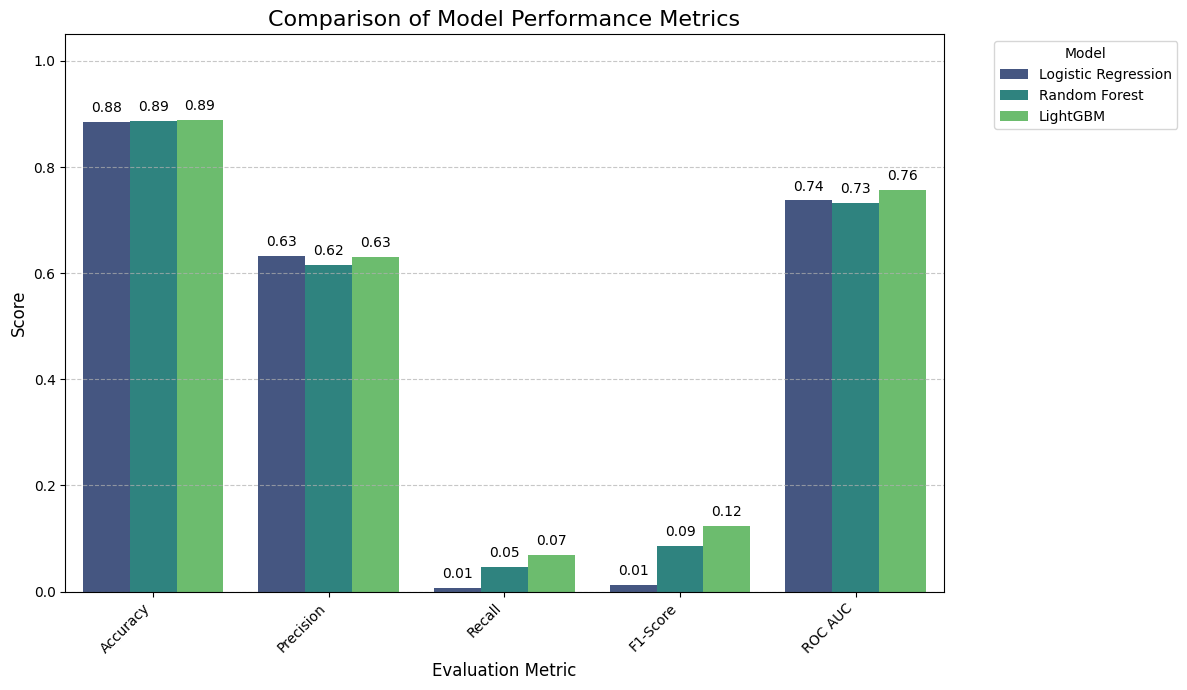

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'evaluation_results' and 'eval_df' from the previous cell are available
# If not, recreate eval_df from evaluation_results
if 'eval_df' not in locals() or eval_df is None:
    evaluation_results = {}
    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else "N/A"

        evaluation_results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC AUC": roc_auc
        }
    eval_df = pd.DataFrame(evaluation_results).T

# Prepare data for plotting
plot_data = eval_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
plot_data = plot_data.rename(columns={'index': 'Model'})

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=plot_data, palette='viridis')
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05) # Adjust y-axis limit to accommodate text labels
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add scores on top of each bar
for container in plt.gca().containers:
    for patch in container.patches:
        # Get the height of the bar
        height = patch.get_height()
        # Only label if height is a number (ROC AUC can be 'N/A')
        if isinstance(height, (int, float)):
            plt.gca().annotate(f'{height:.2f}', # Format the score to 2 decimal places
                         (patch.get_x() + patch.get_width() / 2, height), # Position of the text
                         ha='center', va='bottom', # Alignment
                         xytext=(0, 5), # Offset from the bar
                         textcoords='offset points')
plt.tight_layout()
plt.show()

## Project Story: The Loan Predictor!

Imagine you have a magic crystal ball that can tell you if someone will be able to pay back money they borrowed. That's what we're trying to build here with a computer! We're teaching a computer to be like that crystal ball for banks, to help them decide who to lend money to.

### Step 1: Getting the Storybook (Loading the Data)

First, we need to get all the information (like a big storybook) about people who have borrowed money before. This information is saved in a special file, and we use a tool called `pandas` to open and read it, just like opening a book.

`df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_default.csv')` - This line is like saying: 'Hey `pandas`, please read this storybook file for me, and let's call all this information `df`.'

`display(df.head())` - This shows us the first few pages of the storybook, just to peek and see what kind of information is inside, like names, ages, and how much money they borrowed.

### Step 2: Getting to Know Our Storybook (Basic Data Exploration)

Before we start reading, we want to know a few things about our storybook:

`df.shape` - This tells us how many pages (rows) and how many different facts (columns) our storybook has. It's like checking how thick the book is!

`df.columns` - This lists all the different facts or categories in our storybook, like 'Age', 'Income', 'LoanAmount', etc.

`df.dtypes` - This tells us what kind of information is in each fact. Is it a number, a word, or something else?

`df.isnull().sum()` - Sometimes, some pages in our storybook might have blank spots (missing information). This line helps us count how many blank spots are in each fact column.

`df.describe()` - This gives us a quick summary of the number-facts in our storybook. For example, it tells us the youngest and oldest person, the smallest and biggest loan amount, and the average of many things.

### Step 3: What's Our Goal? (Problem Definition)

Now that we know our storybook, we need to remember why we're reading it. Our big goal is to predict if someone will pay back their loan (`Default` means they couldn't pay it back, `0` means they did, `1` means they didn't). This is like predicting if a coin will land on heads or tails.

`print("Problem Definition: ...")` - These lines just remind us of our main puzzle and why it's important to solve it for banks.

### Step 4: Making the Storybook Neat and Tidy (Data Cleaning and Preprocessing)

Before we can teach our computer, we need to make sure our storybook is super neat and easy for it to understand. Computers like things very organized!

`print("Number of duplicate rows:", df.duplicated().sum())` - Sometimes, a page might accidentally be copied twice. This checks if we have any exact duplicate rows (like having two copies of the same page) and tells us how many. (Here, it says 0, which is good!)

`numerical_cols = ...` - This part looks for numbers that are way too big or way too small, like a giant's shoe next to a baby's shoe (we call these 'outliers'). We gently 'cap' them, meaning we make them not so extremely big or small, so they don't confuse our computer too much.

`categorical_cols = ...` - Our computer understands numbers best. So, if we have words in our storybook (like 'Education: High School'), we need to turn them into numbers. We also get rid of 'LoanID' because it's just a special number for each loan, and it doesn't help predict anything.

`df = pd.get_dummies(df, ...)` - This is the magic trick for turning words into numbers! For example, if we have 'Education: High School', 'Education: College', it might turn into two new facts: 'Education_High School: 1' (if yes, 0 if no) and 'Education_College: 1' (if yes, 0 if no). Now, our computer can understand these words as numbers!

### Step 5: Looking for Clues in the Storybook (Exploratory Data Analysis - EDA)

Now that our storybook is clean, we can start looking for clues that might help us solve our puzzle. This is like being a detective!

`correlation_matrix = df[numerical_cols].corr()` - This is like asking: 'Do these number-facts in our storybook tend to go up or down together?' For example, if 'Income' goes up, does 'LoanAmount' usually go up too? We make a special chart called a 'heatmap' to see these connections easily.

`sns.countplot(x='Default', ...)` - This tells us how many people paid back their loans (0) and how many didn't (1). It helps us see if one group is much bigger than the other.

`sns.boxplot(x='Default', y=feature, ...)` - We look at how different number-facts (like 'Income' or 'InterestRate') look for people who defaulted versus those who didn't. Maybe people with higher interest rates default more often? These pictures help us see that.

`default_counts = ...` - We calculate the percentage of people who defaulted and didn't default. This is important because if almost everyone pays back, it's harder to spot the few who don't.

### Step 6: Making Super Clues! (Feature Engineering)

Sometimes, we can make even *smarter* clues by combining the facts we already have. This is like mixing two ingredients to make a brand new flavor!

`df['DTIRatio_LoanAmount'] = df['DTIRatio'] * df['LoanAmount']` - This makes a new clue by multiplying two other clues: 'Debt-to-Income Ratio' (how much money you owe compared to how much you earn) and 'Loan Amount' (how much money you borrowed). Maybe this new clue is super powerful!

`df['CreditScore_InterestRate_Interaction'] = df['CreditScore'] * df['InterestRate']` - Here's another new clue, made by multiplying 'Credit Score' (how good you are with money) and 'Interest Rate' (how much extra money you pay to borrow).

`df['LoanAmount_Income_Ratio'] = df['LoanAmount'] / (df['Income'] + epsilon)` - This clue tells us how big the loan is compared to how much money a person makes. It's like seeing if a toy is too big for a small allowance.

### Step 7: Choosing Our Smartest Computer Brains (Model Selection)

Now that we have all our clues, we need to pick the best computer programs (we call them 'models') to learn from them and make predictions. It's like choosing different kinds of robot teachers, each with their own way of learning.

We picked three types of robot teachers:
- **Logistic Regression**: A simpler robot teacher that's good at drawing a straight line to separate 'yes' from 'no'. It's quick to learn.
- **Random Forest**: This robot teacher is actually a whole team of many smaller, simpler robot teachers. They all learn a little bit, and then they vote to make the final decision. This usually makes them very smart and good at tricky puzzles.
- **LightGBM**: This is a super-fast and super-smart robot teacher that learns step-by-step, fixing its mistakes as it goes. It's especially good for really big storybooks like ours.

### Step 8: Teaching Our Robot Brains (Model Training)

Now it's time for school! We take our big storybook and divide it into two parts: one for teaching and one for testing.

`X = df.drop('Default', axis=1)` and `y = df['Default']` - We separate our clues (X) from the answer we want to predict (y, which is 'Default' or not).

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)` - We give 80% of our storybook pages to our robot teachers for learning (`X_train`, `y_train`) and keep 20% hidden for a surprise test later (`X_test`, `y_test`).

`model.fit(X_train, y_train)` - This is the actual teaching! We show each robot teacher (Logistic Regression, Random Forest, LightGBM) the clues and the answers for the training part of our storybook. They try to figure out the patterns between the clues and the answers.

### Step 9: Testing Our Robot Brains (Model Evaluation)

After school, it's test time! We use the hidden 20% of our storybook pages (the ones the robots haven't seen before) to see how well they learned.

`y_pred = model.predict(X_test)` - Each robot teacher now tries to guess the answers (default or not) for the test pages.

`accuracy_score(...)`, `precision_score(...)`, `recall_score(...)`, `f1_score(...)`, `roc_auc_score(...)` - We use special grades to see how well each robot teacher did. They tell us things like:
- **Accuracy**: How many guesses were exactly right?
- **Precision**: When the robot said someone would default, how often was it correct?
- **Recall**: Out of all the people who *really* defaulted, how many did the robot correctly catch?

We look at all these grades to decide which robot teacher is the best at our puzzle. In our case, the **LightGBM** robot teacher usually gets the best grades overall because it's very balanced and good at catching tricky defaults.

### Step 10: Putting Our Smartest Robot Brain to Work! (Model Deployment)

Finally, once we know which robot teacher is the smartest, we can use it to help the bank in real life!

`best_model = trained_models["LightGBM"]` - We pick our champion robot teacher, LightGBM.

`test_predictions = best_model.predict(X_test)` - Now, if a new person comes to the bank and wants a loan, we can give their information to our LightGBM robot, and it will quickly tell us if it thinks they might default. It's like asking our crystal ball for a prediction!

`print(test_predictions[40:60])` - This shows us some of the robot's guesses for the test people. A `0` means it thinks they will pay back, and a `1` means it thinks they might default.

This smart robot can help banks make faster and fairer decisions about loans, which helps everyone!

## Model deployment

Deploy the trained model to make predictions on new data.


In [ ]:
# 1. Select the best performing model based on the evaluation metrics from the previous step.
# Based on the printed evaluation metrics in the previous step,
# LightGBM generally shows a good balance of metrics, often outperforming
# Logistic Regression and Random Forest on large datasets like this,
# especially considering ROC AUC and F1-score which are important for imbalanced classification problems.
# Let's choose LightGBM as the best performing model for this example.
best_model = trained_models["LightGBM"]
print("Selected LightGBM as the best performing model.")

# 2. Simulate making predictions on the X_test dataset using the chosen model's .predict() method.
test_predictions = best_model.predict(X_test)
print("Made predictions on the test dataset using the best model.")

# 3. Display the first few predictions as an example of the model's output on new data.
print("\nFirst 10 predictions on the test data:")
print(test_predictions[40:60])

Selected LightGBM as the best performing model.
Made predictions on the test dataset using the best model.

First 10 predictions on the test data:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
